In [1]:
import numpy as np
import pandas as pd
from features import check_data_quality, generate_features, plot_crime_timeline, plot_feature_distributions

In [2]:
df = pd.read_parquet("lapd_offenses_victims_merged.parquet")
df

,caseno,uniquenibrno,date_rptd,date_occ,time_occ,area_name,rpt_dist_no,totaloffensecount,group,nibr_description,...,transit_related_crime,homeless_victim_crime,homeless_suspect_crime,homeless_arrestee_crime,weapon_desc,uniquevictimno,vict_age,vict_descent,vict_sex,victim_type
0,25151345,25151345_23G_0,2025-08-14,2025-08-13,21:00:00,Devonshire,1781,1,A,484(A) - PC - F - Grand Theft - Theft Of Motor...,...,False,False,False,False,None,25151345_0,45,Filipino,F,Person
1,25161221,25161221_90D_0,2025-08-28,2025-08-28,20:55:00,Devonshire,1753,1,B,23152(A) - VC - M - Dui Alcohol - 90D,...,False,False,False,False,None,None,<NA>,None,None,None
2,25154680,25154680_13C_0,2025-08-19,2025-07-05,11:00:00,Foothill,1663,1,A,422(A) - PC - F - Criminal Threats - 13C,...,False,False,False,False,None,25154680_0,23,Hispanic,F,Person
3,25114136,25114136_23H_1,2025-06-22,2025-06-22,12:00:00,Hollywood,668,2,A,484(A) - PC - M - Petty Theft - All Other Larc...,...,False,False,False,False,"Bodily Force - Personal Weapons (hands, feet, ...",25114136_0,24,Black/African American,F,Person
4,25162309,25162309_23G_0,2025-08-30,2025-08-29,23:00:00,Northeast,1184,1,A,484(A) - PC - M - Theft Of Motor Vehicle Parts...,...,False,False,False,False,None,25162309_0,42,Other Asian,F,Person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250025,25051626,25051626_13B_0,2025-03-27,2025-03-25,19:40:00,Pacific,1407,1,A,243(A) - PC - M - Battery On Person - Simple -...,...,False,False,False,False,"Bodily Force - Personal Weapons (hands, feet, ...",25051626_0,30,Other,M,Person
250026,25148925,25148925_13C_0,2025-08-11,2025-08-11,12:20:00,Devonshire,1743,1,A,422(A) - PC - F - Criminal Threats - 13C,...,False,False,False,False,None,25148925_0,36,Hispanic,F,Person
250027,C259031914,C259031914_290_0,2025-08-10,2025-08-06,21:30:00,Devonshire,1755,1,A,594(B)(1) - PC - F - Vandalism ($400 Or More) ...,...,False,False,False,False,None,C259031914_0,39,Other,F,Person
250028,24067924,24067924_220_0,2024-10-01,2024-09-13,08:00:00,N Hollywood,1516,2,A,459 - PC - F - Burglary - 220,...,False,False,False,False,None,24067924_0,30,White,F,Person


In [3]:
df['date_occ'].min(), df['date_occ'].max()

(Timestamp('2024-01-01 00:00:00'), Timestamp('2025-11-15 00:00:00'))

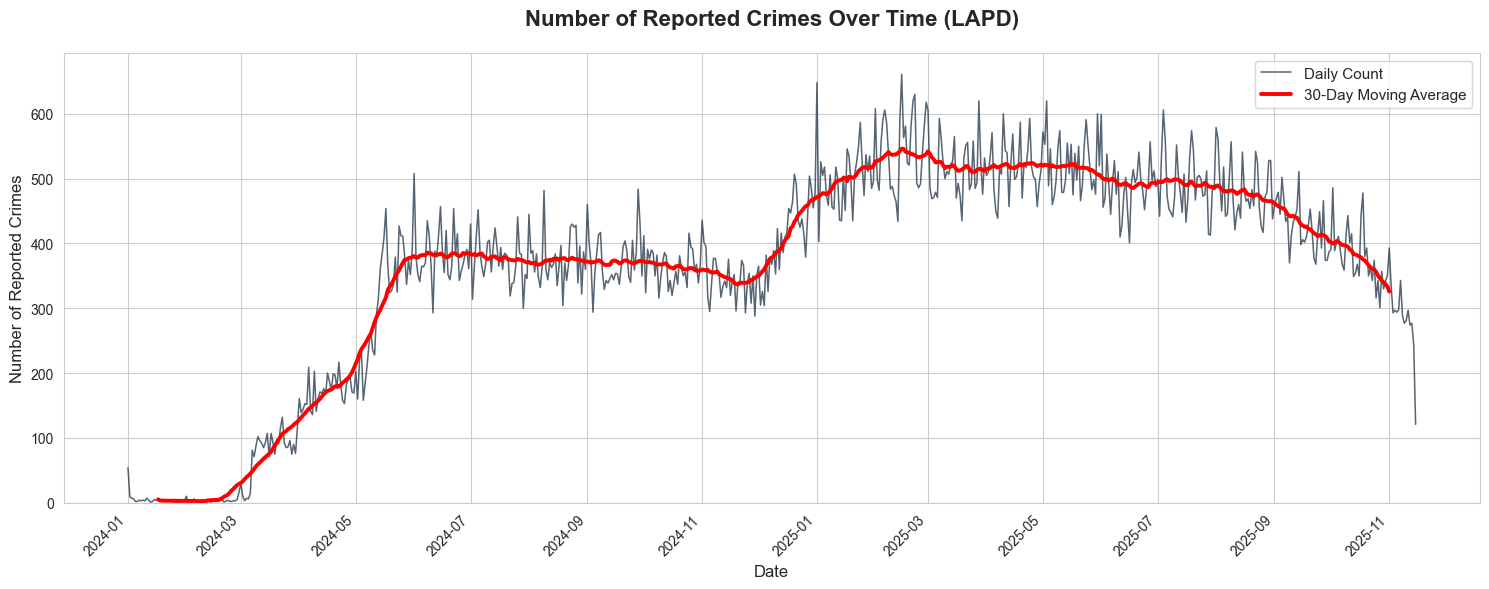

Date range          : 2024-01-01 → 2025-11-15
Total days          : 677
Average daily crimes: 369
Peak day            : 2025-02-15 → 661 crimes
Lowest day          : 2024-01-13 → 1 crimes


In [4]:
# time consistency over time
plot_crime_timeline(df)

In [5]:
df_features = generate_features(df)
df_features

,area_name,totaloffensecount,group,nibr_description,crime_against,premis_desc,status_desc,totalvictimcount,victim_shot,domestic_violence_crime,...,homeless_victim_crime,homeless_suspect_crime,homeless_arrestee_crime,weapon_desc,vict_age,vict_descent,vict_sex,victim_type,month,is_weekend
0,Devonshire,1,A,Other,Property,Apartment/Condominium/Townhouse,Investigation Continued,1,0,0,...,0,0,0,Missing,45-60,Other,F,Person,8,0
1,Devonshire,1,B,Other,Society,Street/Parkway,Investigation Continued,0,0,0,...,0,0,0,Missing,Missing,Missing,Other,Missing,8,0
2,Foothill,1,A,422(A) - PC - F - Criminal Threats - 13C,Person,Victim's Residence,Cleared by Arrest,1,0,1,...,0,0,0,Missing,18-30,Hispanic,F,Person,7,1
3,Hollywood,2,A,484(A) - PC - M - Petty Theft - All Other Larc...,Property,Other,Investigation Continued,1,0,1,...,0,0,0,"Bodily Force - Personal Weapons (hands, feet, ...",18-30,Black/African American,F,Person,6,1
4,Northeast,1,A,Other,Property,Street/Parkway,Investigation Continued,1,0,0,...,0,0,0,Missing,30-45,Other Asian,F,Person,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250023,Topanga,2,A,594(B)(1) - PC - F - Vandalism ($400 Or More) ...,Property,Residence / Home / Driveway,Investigation Continued,1,0,0,...,0,0,0,Missing,45-60,Black/African American,M,Person,11,1
250025,Pacific,1,A,243(A) - PC - M - Battery On Person - Simple -...,Person,Other,Investigation Continued,1,0,0,...,0,0,0,"Bodily Force - Personal Weapons (hands, feet, ...",30-45,Other,M,Person,3,0
250026,Devonshire,1,A,422(A) - PC - F - Criminal Threats - 13C,Person,Other,Investigation Continued,1,0,1,...,0,0,0,Missing,30-45,Hispanic,F,Person,8,0
250027,Devonshire,1,A,594(B)(1) - PC - F - Vandalism ($400 Or More) ...,Property,Street/Parkway,Investigation Continued,1,0,0,...,0,0,0,Missing,30-45,Other,F,Person,8,0


In [6]:
df_features.duplicated().any()

np.False_

In [7]:
print("Feature Data Types:")
print(df_features.dtypes)
print("\n")
print("Summary:")
print(f"Total columns: {len(df_features.columns)}")
print(f"Categorical columns: {df_features.select_dtypes(include=['category']).shape[1]}")
print(f"Numeric columns: {df_features.select_dtypes(include=[np.number]).shape[1]}")
print(f"Boolean columns: {df_features.select_dtypes(include=['bool']).shape[1]}")

Feature Data Types:
area_name                  category
totaloffensecount          category
group                      category
nibr_description           category
crime_against              category
premis_desc                category
status_desc                category
totalvictimcount           category
victim_shot                   int64
domestic_violence_crime       int64
hate_crime                    int64
gang_related_crime            int64
transit_related_crime         int64
homeless_victim_crime         int64
homeless_suspect_crime        int64
homeless_arrestee_crime       int64
weapon_desc                category
vict_age                   category
vict_descent               category
vict_sex                   category
victim_type                category
month                      category
is_weekend                    int64
dtype: object


Summary:
Total columns: 23
Categorical columns: 14
Numeric columns: 9
Boolean columns: 0


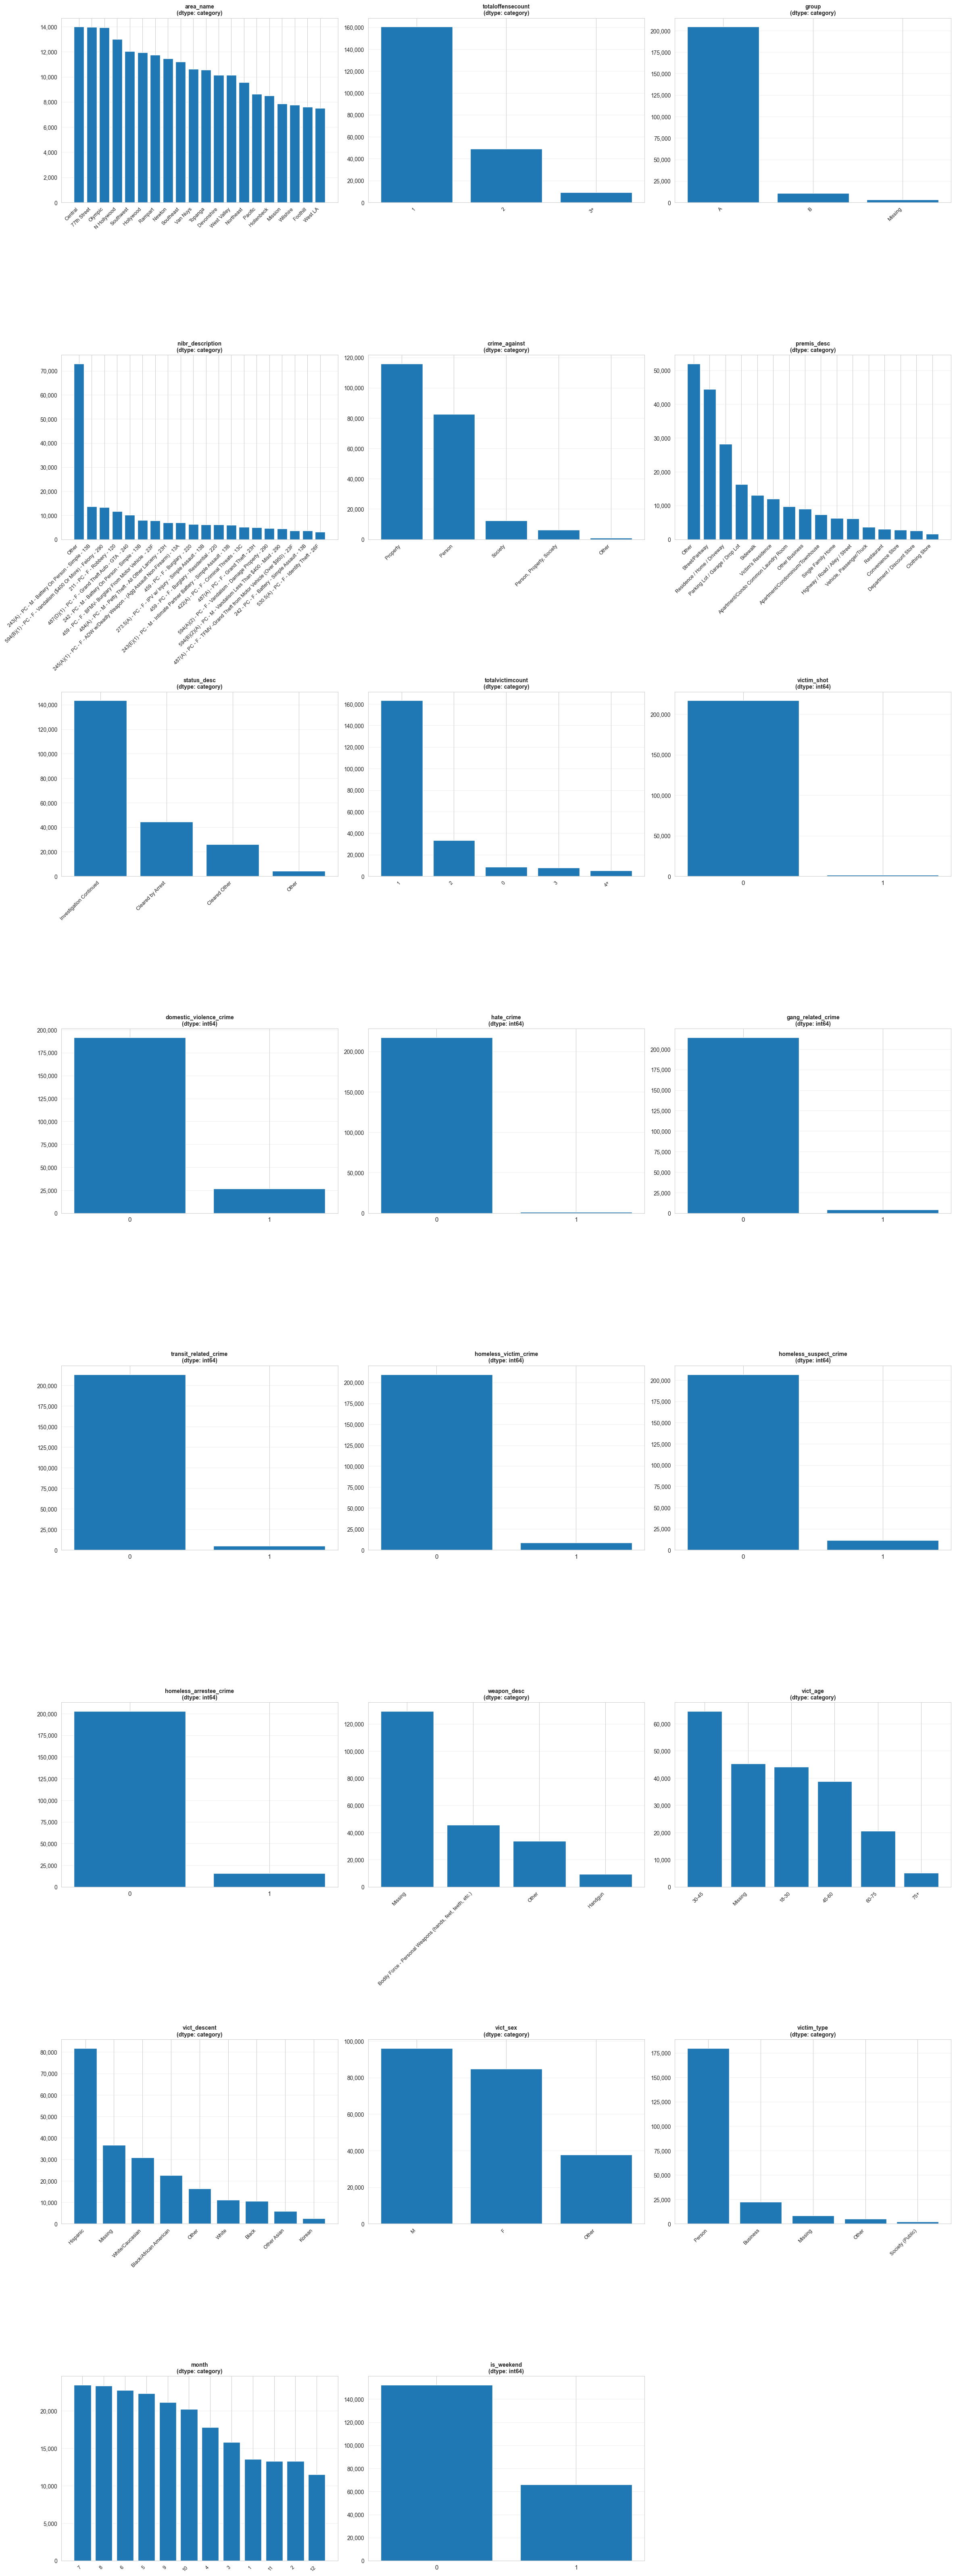

In [8]:
plot_feature_distributions(df_features)

In [9]:
quality_report = check_data_quality(df_features)

DATA QUALITY REPORT

Total rows: 218472
Total columns: 23

Is Balanced: True

NaN Summary:
------------------------------------------------------------
area_name                      | NaN:      0 ( 0.00%) | Non-NaN: 218472
totaloffensecount              | NaN:      0 ( 0.00%) | Non-NaN: 218472
group                          | NaN:      0 ( 0.00%) | Non-NaN: 218472
nibr_description               | NaN:      0 ( 0.00%) | Non-NaN: 218472
crime_against                  | NaN:      0 ( 0.00%) | Non-NaN: 218472
premis_desc                    | NaN:      0 ( 0.00%) | Non-NaN: 218472
status_desc                    | NaN:      0 ( 0.00%) | Non-NaN: 218472
totalvictimcount               | NaN:      0 ( 0.00%) | Non-NaN: 218472
victim_shot                    | NaN:      0 ( 0.00%) | Non-NaN: 218472
domestic_violence_crime        | NaN:      0 ( 0.00%) | Non-NaN: 218472
hate_crime                     | NaN:      0 ( 0.00%) | Non-NaN: 218472
gang_related_crime             | NaN:      0 ( 0.00%) | 